# Types of correlations:
### 1. Pearson
- Finds linear correlation
- Non monotonic dependent variables like x=y^2 (x belong to -1 to 1) can have 0 Pearson correlation
![](https://i.imgur.com/4bDj7QP.png)
### 2. Spearman
- Has same problem, for non monotonic dependent variables it too can be zero
- But since it works on ranks, it works well with non-linear relations like x=y^2 fir positive x
![](https://i.imgur.com/FZIDVNQ.png)
### 3. Kendall
- Denoted with τ (Tau)
- Has same problem, for non monotonic dependent variables it too can be zero
- for a pair of ranks (Xi, Xj), (Yi, Yj) they can be:
    - **Concordant**: (Xi-Xj)(Yi-Yj) > 0
    - **Discordant**: (Xi-Xj)(Yi-Yj) < 0
![](https://i.imgur.com/wjCk5Zr.png)

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Make data

In [2]:
# linear
y = np.random.randint(-100, 100, 500)
z = 2*y + np.random.randint(-50, 50, 500)
X1 = pd.DataFrame({
                                'y':y,
                                'z':z,
        }, index=np.arange(len(y)))
X1.head()

,y,z
0,77,169
1,-10,-28
2,-27,-8
3,-20,-87
4,55,75


In [3]:
# non-monotonic
y = np.random.randint(-10, 10, 500)
z = np.sin(y)
X_non_monotonic = pd.DataFrame({
                                'y':y,
                                'z':z,
        }, index=np.arange(len(y)))
X_non_monotonic.head()

,y,z
0,5,-0.958924
1,7,0.656987
2,1,0.841471
3,-3,-0.141120
4,-2,-0.909297


In [4]:
# non-linear dependent
y = np.random.randint(0, 20, 500)
z = y**10
X_non_linear = pd.DataFrame({
                                'y':y,
                                'z':z,
        }, index=np.arange(len(y)))
X_non_linear.head()

,y,z
0,4,1048576
1,1,1
2,13,137858491849
3,4,1048576
4,12,61917364224


# Plot all

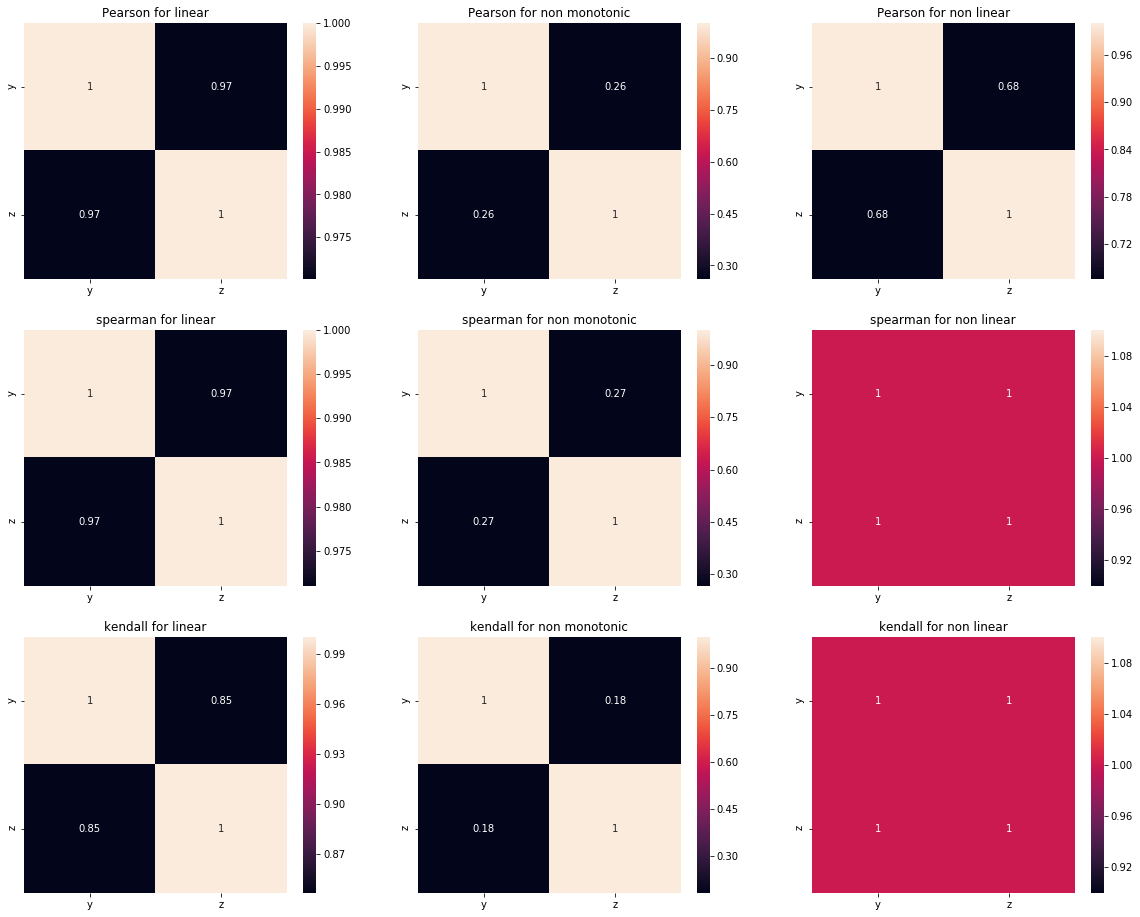

In [5]:
f, axes = plt.subplots(3, 3, figsize=(20,16))
axes[0][0].set_title('Pearson for linear')
sns.heatmap(X1.corr(method='pearson'), annot = True, ax=axes[0][0])

axes[0][1].set_title('Pearson for non monotonic')
sns.heatmap(X_non_monotonic.corr(method='pearson'), annot = True, ax=axes[0][1])

axes[0][2].set_title('Pearson for non linear')
sns.heatmap(X_non_linear.corr(method='pearson'), annot = True, ax=axes[0][2])

axes[1][0].set_title('spearman for linear')
sns.heatmap(X1.corr(method='spearman'), annot = True, ax=axes[1][0])

axes[1][1].set_title('spearman for non monotonic')
sns.heatmap(X_non_monotonic.corr(method='spearman'), annot = True, ax=axes[1][1])

axes[1][2].set_title('spearman for non linear')
sns.heatmap(X_non_linear.corr(method='spearman'), annot = True, ax=axes[1][2])

axes[2][0].set_title('kendall for linear')
sns.heatmap(X1.corr(method='kendall'), annot = True, ax=axes[2][0])

axes[2][1].set_title('kendall for non monotonic')
sns.heatmap(X_non_monotonic.corr(method='kendall'), annot = True, ax=axes[2][1])

axes[2][2].set_title('kendall for non linear')
sns.heatmap(X_non_linear.corr(method='kendall'), annot = True, ax=axes[2][2])

# Observations
- Kendall is worse than pearson and spearman in capturing linear correlation (left plots)
- All three are incapable of capturing non-monotonic dependencies (middle plots)
- Pearson is the worst in capturing non-linear correlation because it doesn't use rank (right plots). This is why it also fails to find informative correlation between ordinal features